```bash
#!pip install -q diffusers transformers accelerate invisible-watermark>=0.2.0
```
invisible-watermark 水印帮助鉴别生成图像，如果安装 disable 方法
```python
pipeline = StableDiffusionXLPipeline.from_pretrained(..., add_watermarker=False)

```

In [3]:
from diffusers import StableDiffusionXLPipeline, StableDiffusionXLImg2ImgPipeline
import torch

model_dir = "/media/wtyang/KINGSTON/Model/"
pipeline = StableDiffusionXLPipeline.from_pretrained(
    model_dir + "stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")


'''
refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    model_dir + "stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16"
).to("cuda")
'''

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

'\nrefiner = StableDiffusionXLImg2ImgPipeline.from_pretrained(\n    model_dir + "stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16"\n).to("cuda")\n'

## Text-to-image
By default, SDXL generates a 1024x1024 image for the best results. You can try setting the height and width parameters to 768x768 or 512x512, but anything below 512x512 is not likely to work.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

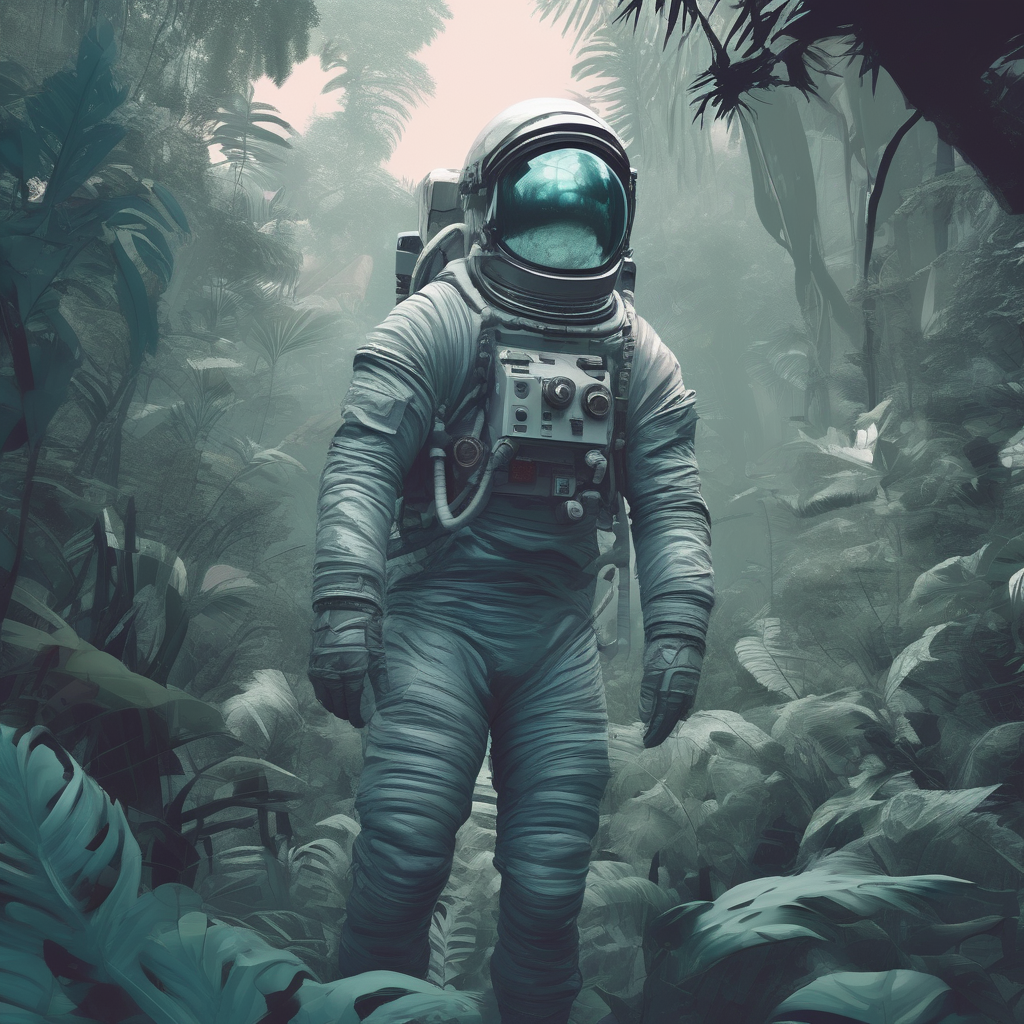

In [4]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline_text2image = AutoPipelineForText2Image.from_pretrained(
    model_dir + "stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
image = pipeline_text2image(prompt=prompt).images[0]
image

## Image-to-image
SDXL works especially well with image sizes between 768x768 and 1024x1024. Pass an initial image, and a text prompt to condition the image with:

In [5]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid

# use from_pipe to avoid consuming additional memory when loading a checkpoint
pipeline = AutoPipelineForImage2Image.from_pipe(pipeline_text2image).to("cuda")

url = "./sdxl-text2img.png"
init_image = load_image(url)
prompt = "a dog catching a frisbee in the jungle"
image = pipeline(prompt, image=init_image, strength=0.8, guidance_scale=10.5).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

ConnectionError: HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /datasets/huggingface/documentation-images/resolve/main/diffusers/sdxl-text2img.png (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x76fd830426d0>: Failed to establish a new connection: [Errno 101] Network is unreachable'))